<a href="https://colab.research.google.com/github/AhmedSaeed-ML/Supply-chain-Data-Analysis/blob/main/Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Credit Data

Job ( 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)


Saving accounts (text - little, moderate, quite rich, rich)

Checking account (text - little, moderate,rich)


Duration (numeric, in month)

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import gaussian_kde

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,RobustScaler,OrdinalEncoder

import time
import itertools


from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, OPTICS, AffinityPropagation, SpectralClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch


# Data Frame

In [64]:
file= "/content/drive/MyDrive/Ahmed /german_credit_data.csv"
df=pd.read_csv(file)
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [ ]:
df.shape

(1000, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [ ]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


#  Data Quality

## Completeness

In [6]:
# Checking missing values
missing_values = df.isnull().sum()

if missing_values.sum() == 0:
    print("There are no missing values ​​in all columns.")
else:
    columns_with_missing = missing_values[missing_values > 0]
    for column, count in columns_with_missing.items():
        total = len(df)
        percentage = (count / total) * 100
        print(f"Column '{column}' has {count} missing values out of {total} ({percentage:.2f}%)")

Column 'Saving accounts' has 183 missing values out of 1000 (18.30%)
Column 'Checking account' has 394 missing values out of 1000 (39.40%)


In [65]:
df['Saving accounts'] = df['Saving accounts'].fillna("No account")
df['Checking account'] = df['Checking account'].fillna("No account")

## Uniqueness

In [10]:
# Handle duplicates
duplicates=df[df.duplicated()]
print (duplicates.shape)
df[df.duplicated()]

(0, 10)


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose


## Consistency

In [66]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [12]:
# Convert encoded data to original
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,No account,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,No account,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [13]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [14]:
df['Job'].unique()

array([2, 1, 3, 0])

In [67]:
# Columns Mapping
Job={ 0 : "unskilled and non-resident", 1 : "unskilled and resident", 2 : "skilled", 3 : "highly skilled"}
df["Job"]=df["Job"].map(Job)



## Check Validity

In [16]:
for i in df.select_dtypes("number").columns:
  print("{}, {} -> {}".format(i,df[i].min(),df[i].max()))
  print("-"*50)

Age, 19 -> 75
--------------------------------------------------
Credit amount, 250 -> 18424
--------------------------------------------------
Duration, 4 -> 72
--------------------------------------------------


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


In [18]:
for i in df.select_dtypes("object"):
  print (i)
  print (df[i].unique())
  print("_"*50)

Sex
['male' 'female']
__________________________________________________
Job
['skilled' 'unskilled and resident' 'highly skilled'
 'unskilled and non-resident']
__________________________________________________
Housing
['own' 'free' 'rent']
__________________________________________________
Saving accounts
['No account' 'little' 'quite rich' 'rich' 'moderate']
__________________________________________________
Checking account
['little' 'moderate' 'No account' 'rich']
__________________________________________________
Purpose
['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
__________________________________________________


#Data Exploration

## Univariate Analysis

In [ ]:
for i in df.select_dtypes("object").columns:
  print (df[i].value_counts())
  print  ("-"*50)

Sex
male      690
female    310
Name: count, dtype: int64
--------------------------------------------------
Job
skilled                       630
unskilled and resident        200
highly skilled                148
unskilled and non-resident     22
Name: count, dtype: int64
--------------------------------------------------
Housing
own     713
rent    179
free    108
Name: count, dtype: int64
--------------------------------------------------
Saving accounts
little        603
No account    183
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64
--------------------------------------------------
Checking account
No account    394
little        274
moderate      269
rich           63
Name: count, dtype: int64
--------------------------------------------------
Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacatio

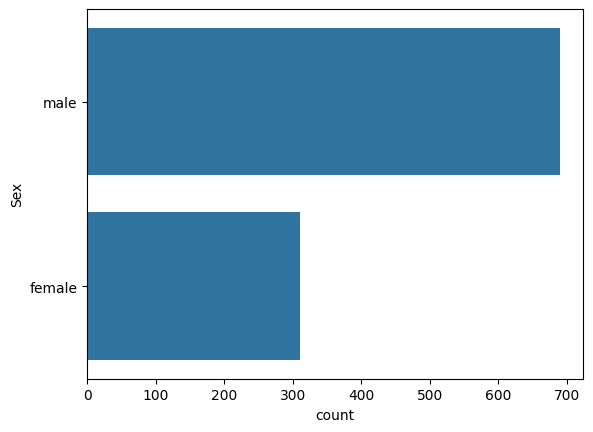

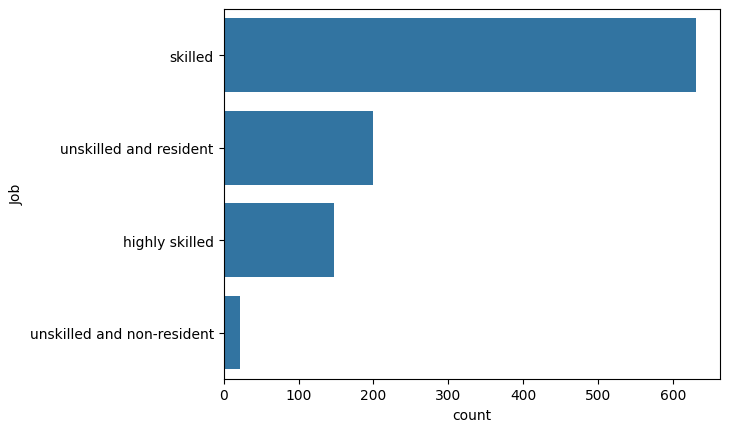

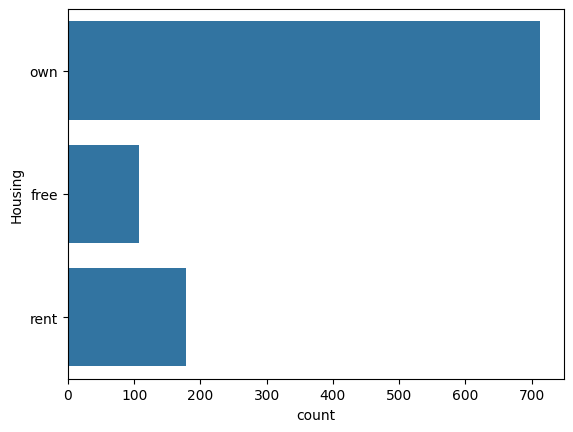

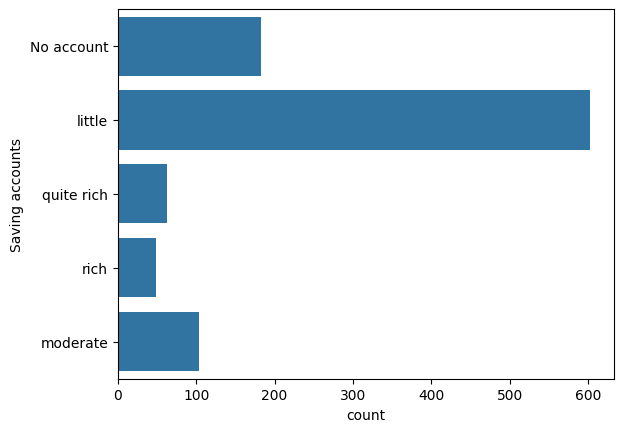

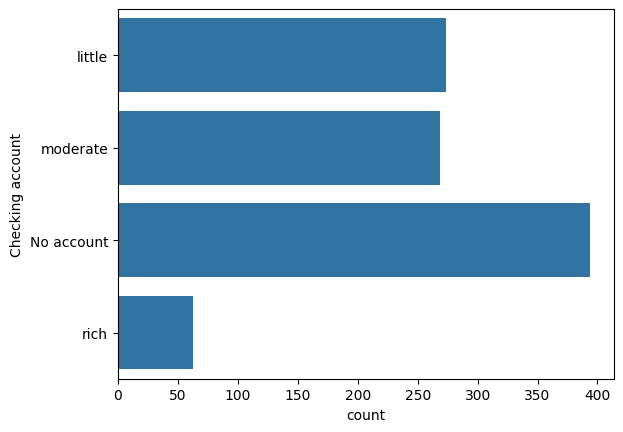

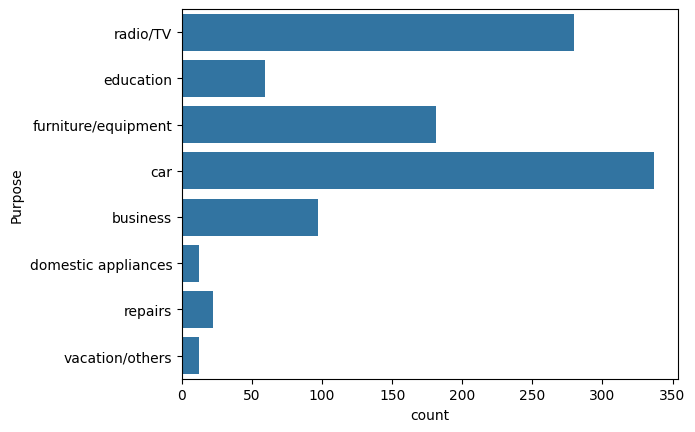

In [24]:
#Display Categorical data
for i in df.select_dtypes("object").columns:
  sns.countplot(df[i])
  plt.show()

In [23]:
#Display Numerical data
for col in df.select_dtypes("number").columns:
    fig = px.histogram(df, x=col, histnorm='probability density', opacity=0.5)
    kde = gaussian_kde(df[col])
    x_values = np.linspace(df[col].min(), df[col].max(), 100)
    kde_values = kde(x_values)
    fig.add_trace(go.Scatter(x=x_values, y=kde_values, mode='lines', name='KDE', line=dict(color='red')))
    fig.show()

In [25]:
# Display Outliers
for i in df.select_dtypes(include='number').columns:
  fig = px.box(df, y=i)
  print(i)
  fig.show()

Age


Credit amount


Duration


## Bivariate Analysis

<Axes: >

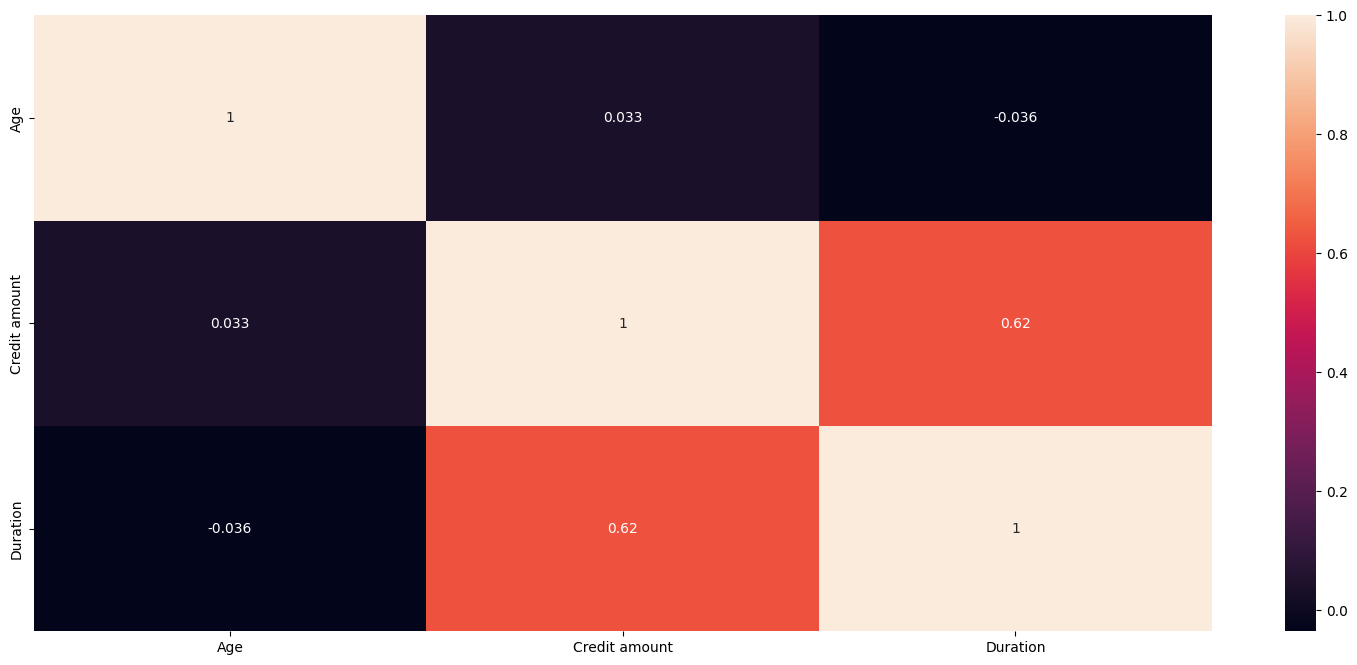

In [26]:
plt.figure(figsize=(19,8))
sns.heatmap(df.select_dtypes("number").corr(), annot=True)

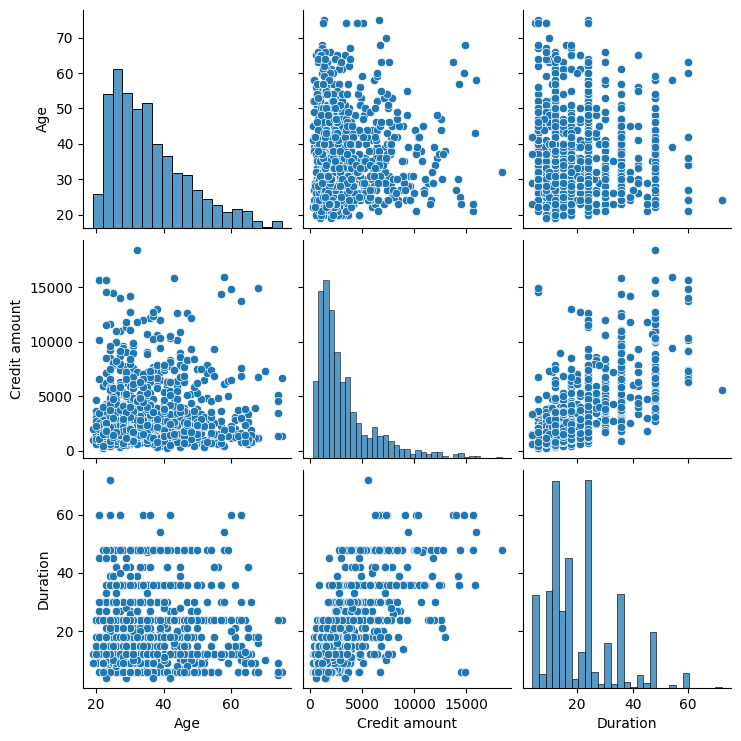

In [27]:
sns.pairplot(data=df[:-1])

## Multivariate Analysis

In [60]:
px.scatter(data_frame=df,x="Credit amount", y="Duration",color="Sex",hover_name="Job" )

# Data preprocessing

In [74]:
myencoder=OrdinalEncoder()
df[df.select_dtypes("object").columns]=myencoder.fit_transform(df[df.select_dtypes("object").columns])

# Create Elbow

<Axes: >

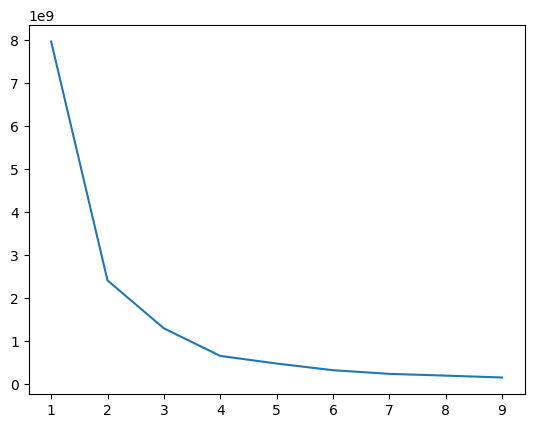

In [75]:
ssd=[]
for k in range(1,10):
  kmeanmodel=KMeans(n_clusters=k)
  kmeanmodel.fit(df)
  ssd.append(kmeanmodel.inertia_)  #inertia to calcultae sum squred distance
sns.lineplot(x=range(1,10), y= ssd)


# Models test

In [77]:
k=4
kmeanmodel=KMeans(n_clusters=k)
kmeanmodel.fit(df)
df["kmeanslabel"]=kmeanmodel.labels_

In [78]:
print (kmeanmodel.labels_ )   # to dispaly labels
kmeanmodel.cluster_centers_   # to dispaly centroid center

[0 1 0 1 2 1 2 1 2 2 0 2 0 0 0 0 0 1 3 2 0 2 0 0 0 0 0 0 0 1 0 2 1 0 0 2 1
 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 2 0 0 1 1 0 1 0 0 0 3 2 2 0 0 0 0 1 0 0 1
 0 0 2 2 1 2 1 0 0 0 0 0 0 3 0 0 0 0 0 2 0 3 0 2 0 1 0 0 0 0 0 3 1 1 1 0 0
 0 1 1 0 2 1 0 2 0 0 2 0 0 0 0 0 0 0 2 1 1 2 0 3 0 1 0 2 0 0 2 2 0 0 2 0 0
 1 0 0 0 1 1 1 0 0 0 2 0 2 0 0 1 0 2 0 0 2 0 0 0 0 0 2 1 2 0 0 0 1 2 0 2 0
 0 2 0 0 2 2 2 2 0 2 0 0 0 2 2 0 0 2 0 0 3 0 0 1 0 2 2 2 0 2 0 2 2 2 0 0 0
 0 2 2 2 3 1 0 2 2 0 0 0 0 0 3 2 0 2 0 0 2 0 2 0 0 0 0 0 0 0 0 2 0 1 2 0 2
 0 0 0 2 2 0 0 1 0 1 0 2 0 3 2 3 2 0 0 2 0 2 0 0 0 2 3 2 1 0 0 0 1 1 2 1 3
 2 0 0 2 0 2 0 0 3 0 2 0 0 0 1 1 2 0 0 2 0 2 0 2 2 0 2 2 0 2 1 0 2 0 1 0 1
 3 2 2 0 0 2 0 1 2 2 2 2 0 0 2 0 0 0 0 2 1 0 0 0 2 0 0 0 2 0 0 0 0 2 2 2 2
 2 1 0 3 3 1 0 0 3 0 0 3 0 0 2 0 0 1 0 0 0 0 2 0 0 3 2 0 0 0 0 0 1 0 2 0 0
 0 2 0 0 1 0 0 0 1 2 1 2 0 2 0 0 0 2 2 2 0 0 0 2 3 0 0 0 0 0 0 2 0 0 0 2 0
 2 0 0 2 0 0 3 0 2 2 2 2 2 2 0 2 2 0 2 0 0 2 0 1 2 2 2 0 0 0 0 2 2 2 0 0 2
 0 2 0 0 0 2 2 0 2 0 1 0 

array([[ 3.56437848e+01,  6.54916512e-01,  1.45083488e+00,
         1.10946197e+00,  1.24860853e+00,  9.96289425e-01,
         1.46158998e+03,  1.50055659e+01,  3.13543599e+00,
        -6.66133815e-16],
       [ 3.67557252e+01,  7.78625954e-01,  8.93129771e-01,
         9.54198473e-01,  9.46564885e-01,  9.92366412e-01,
         7.14835878e+03,  3.33664122e+01,  2.16793893e+00,
         1.03053435e+00],
       [ 3.46366782e+01,  7.05882353e-01,  1.20415225e+00,
         1.08996540e+00,  1.21107266e+00,  9.89619377e-01,
         3.56882699e+03,  2.34913495e+01,  2.76816609e+00,
         2.94809689e+00],
       [ 3.68048780e+01,  7.56097561e-01,  6.58536585e-01,
         8.04878049e-01,  1.04878049e+00,  1.17073171e+00,
         1.25764634e+04,  4.03658537e+01,  2.53658537e+00,
         2.00000000e+00]])

In [79]:
Aggmodel=AgglomerativeClustering(n_clusters=k)
Aggmodel.fit(df)
df["agglabels"]=Aggmodel.labels_

In [80]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,kmeanslabel,agglabels
0,67,1.0,1.0,1.0,0.0,1.0,1169,6,5.0,0,3
1,22,0.0,1.0,1.0,1.0,2.0,5951,48,5.0,1,2
2,49,1.0,3.0,1.0,1.0,0.0,2096,12,3.0,0,1
3,45,1.0,1.0,0.0,1.0,1.0,7882,42,4.0,1,2
4,53,1.0,1.0,0.0,1.0,1.0,4870,24,1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...
995,31,0.0,3.0,1.0,1.0,0.0,1736,12,4.0,0,1
996,40,1.0,0.0,1.0,1.0,1.0,3857,30,1.0,2,1
997,38,1.0,1.0,1.0,1.0,0.0,804,12,5.0,0,3
998,23,1.0,1.0,0.0,1.0,1.0,1845,45,5.0,0,1


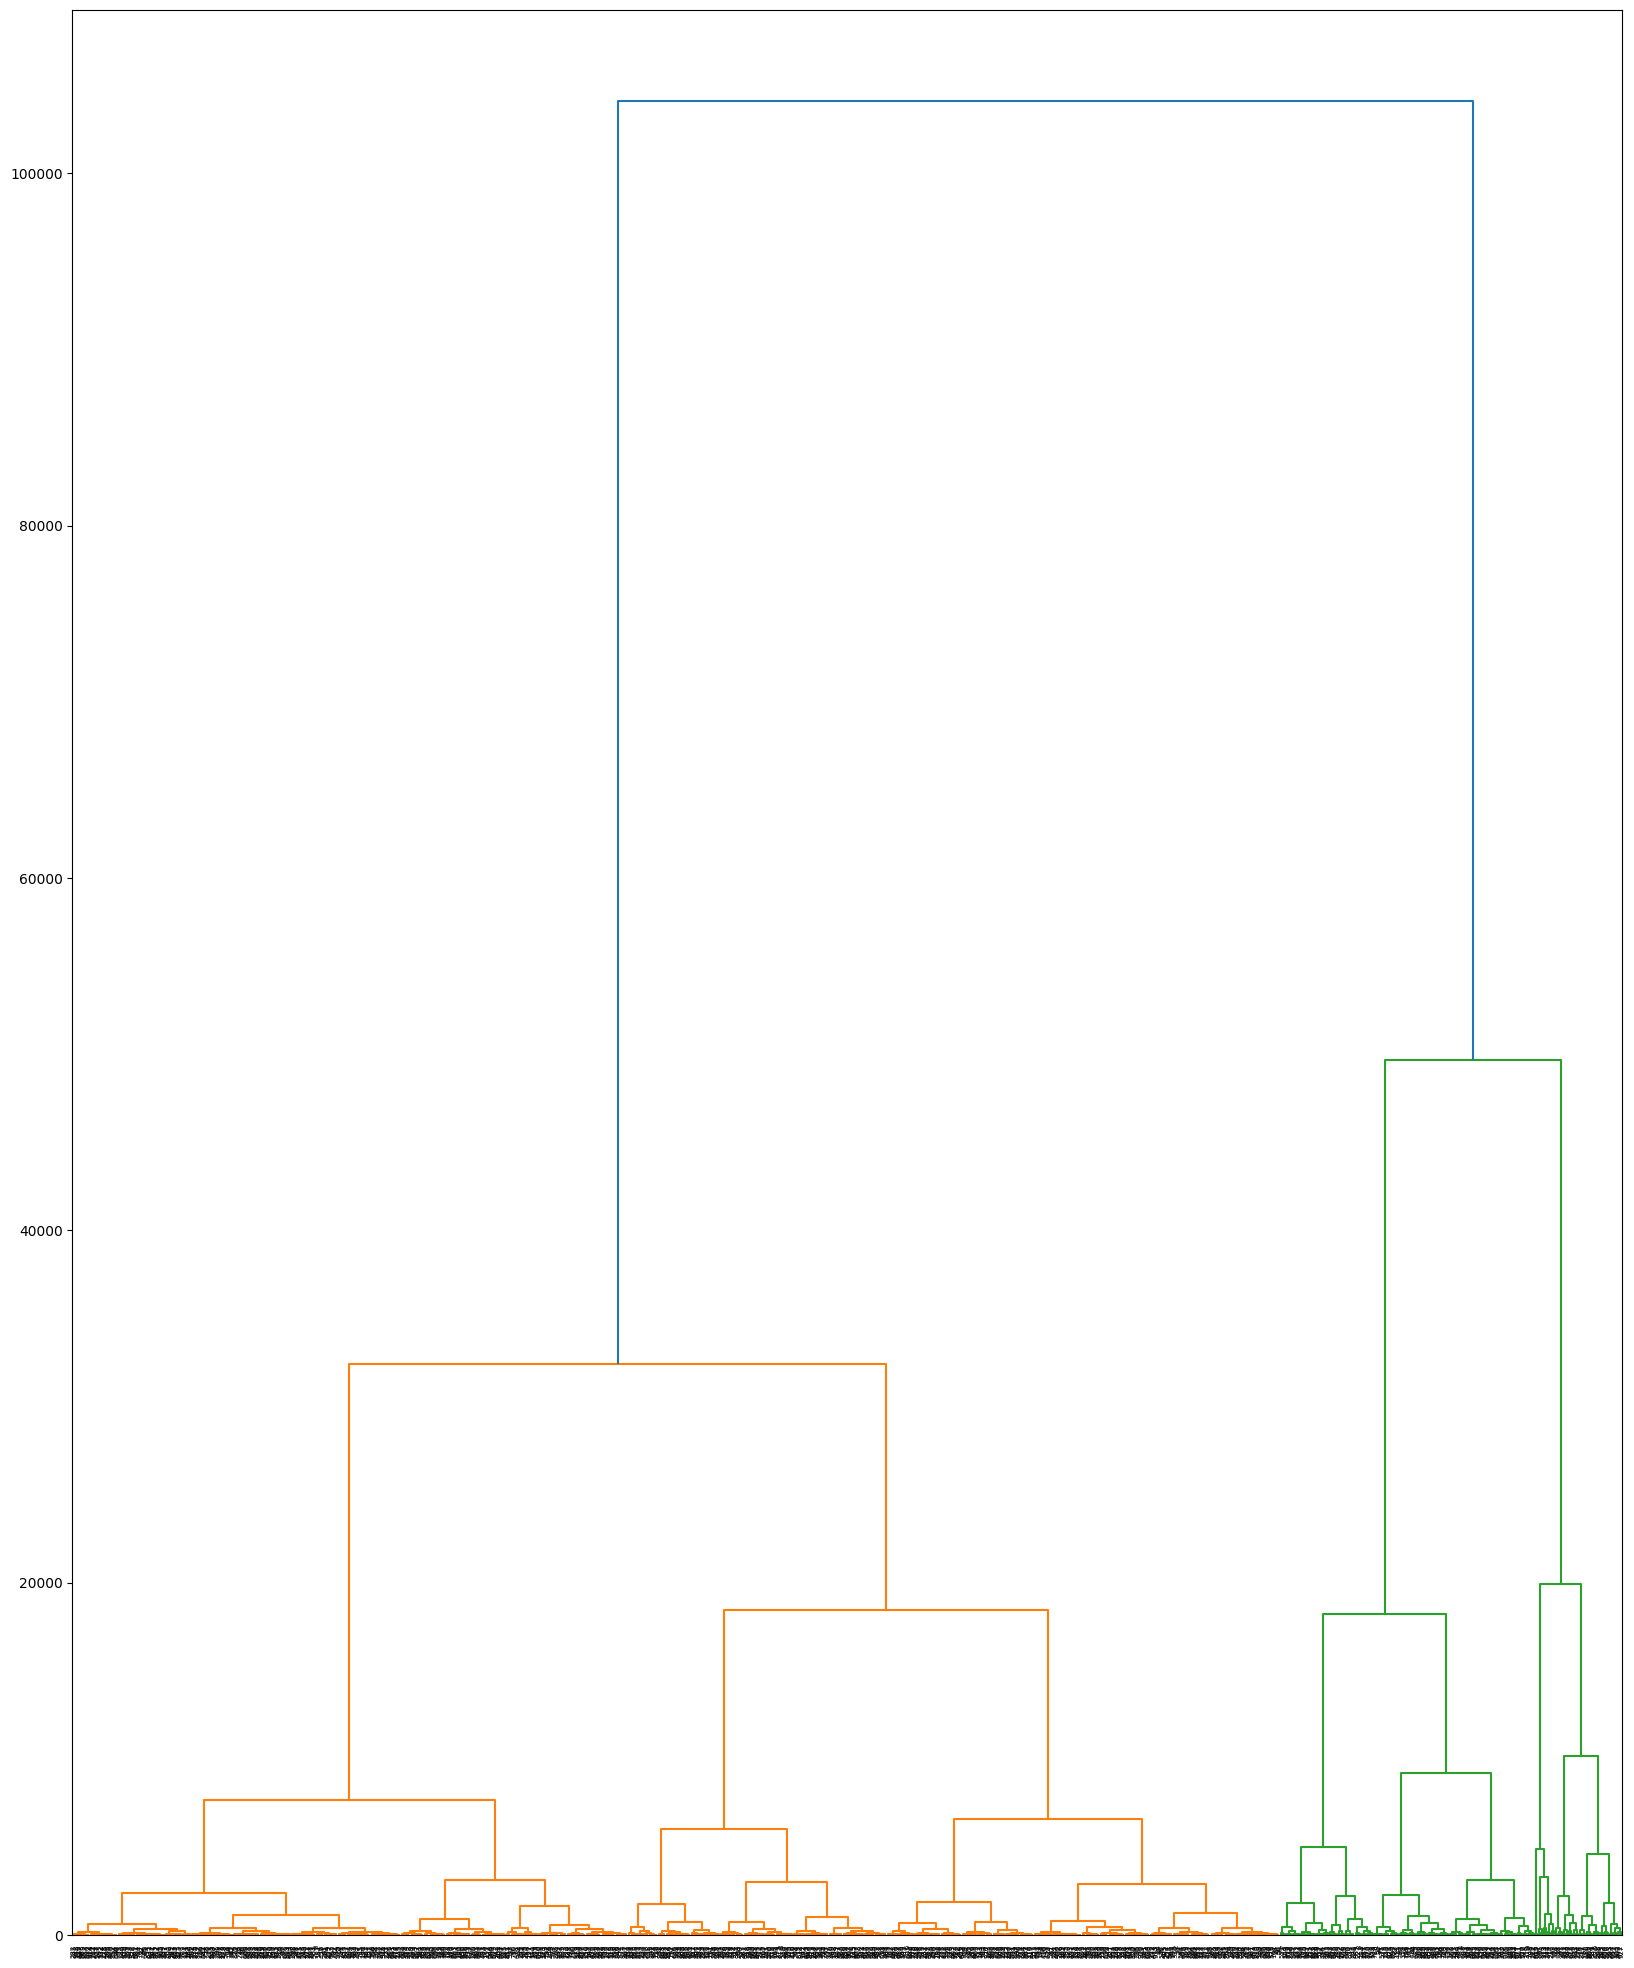

In [81]:
plt.figure(figsize=(20,25))
dendrogram=sch.dendrogram(sch.linkage(df,method="ward"))

In [82]:
df.groupby("kmeanslabel")[["Credit amount",	"Duration"	]].mean()

,Credit amount,Duration
kmeanslabel,,
0,1465.476895,15.011091
1,7148.358779,33.366412
2,3576.184669,23.540070
3,12576.463415,40.365854


In [83]:
df.groupby("agglabels")[["Credit amount",	"Duration"	]].mean()

,Credit amount,Duration
agglabels,,
0,11695.589286,39.660714
1,2788.769596,20.942993
2,6264.787879,31.054545
3,1141.181564,13.243017
